<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/ColorSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de la segmentation d'une image

Exécuter les 2 lignes suivantes pour colab.

In [1]:
!git clone https://github.com/gabilodeau/INF6804
%cd INF6804

Cloning into 'INF6804'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (170/170), done.
remote: Compressing objects: 100% (162/162), done.
remote: Total 335 (delta 83), reused 24 (delta 7), pack-reused 165
Receiving objects: 100% (335/335), 33.57 MiB | 32.52 MiB/s, done.
Resolving deltas: 100% (145/145), done.
/content/INF6804


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Lecture d'une image.

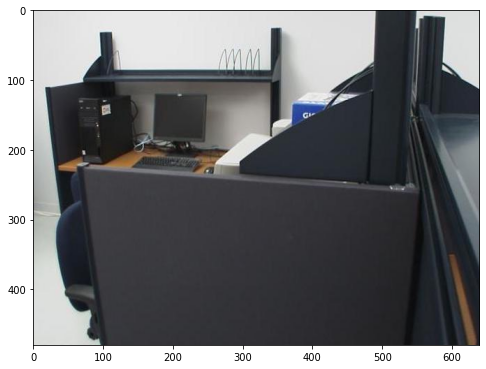

In [4]:
image = cv2.imread('images/bureau.jpg')
b,g,r = cv2.split(image) #OpenCV lit les images en BGR
image = cv2.merge([r,g,b])
#ou image = image[:,:,::-1]
plt.figure(figsize = (8,8))
plt.imshow(image)
plt.show()

Segmentation avec K-means. Segmentation en incluant la position des pixels dans l'image. On fera le groupement de vecteurs [R,G,B,X,Y] La plupart des pixels d'un groupe seront connectés entre eux.

Cas 1: Sous-segmentation, pas assez de groupes

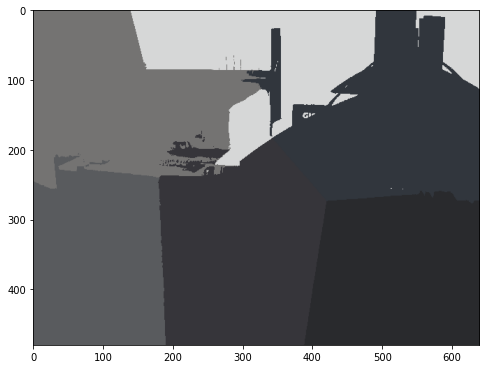

In [5]:
# Nombre de groupes
K = 6 
# Définition des critères d'arret. EPS est le déplacement des centres 
criteresArret = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

RGBPix = image.reshape((-1,3))

# Pour ajouter la position. Groupement de vecteur 1 par 5 plutôt que 1 par 3.
RGBetPosPix= np.zeros((len(RGBPix),5),dtype=np.float32)

# Création d'une matrice de coordonnées.
x = np.linspace(0, image.shape[1]-1,image.shape[1])
y = np.linspace(0, image.shape[0]-1,image.shape[0])
# Pour obtenir les paires de coordonnées possibles.
X,Y = np.meshgrid(x, y)
X= X.reshape((-1),1)
Y= Y.reshape((-1),1)

RGBetPosPix = np.hstack((RGBPix,X,Y))
RGBetPosPix = np.float32(RGBetPosPix)

ret,etiquettes,centres=cv2.kmeans(RGBetPosPix,K,None,criteresArret,1,cv2.KMEANS_RANDOM_CENTERS)

centres = np.uint8(centres)
centressansPos= np.zeros((K,3),dtype=np.uint8) #Pour affichage des classes
for i in range(0,len(centres)):
    centressansPos[i]=centres[i][0:3]

res = centressansPos[etiquettes] #On utilise la couleur de son centre pour représenter chaque segment.
res2 = res.reshape((image.shape))
plt.figure(figsize = (8,8))
plt.imshow(res2)
plt.show()

Cas 2: Sur-segmentation, trop de groupes

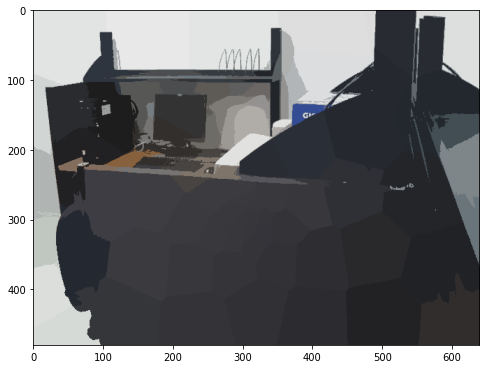

In [6]:
K = 100

ret,etiquettes,centres=cv2.kmeans(RGBetPosPix,K,None,criteresArret,1,cv2.KMEANS_RANDOM_CENTERS)

centres = np.uint8(centres)
centressansPos= np.zeros((K,3),dtype=np.uint8) #Pour affichage des classes
for i in range(0,len(centres)):
    centressansPos[i]=centres[i][0:3]

res = centressansPos[etiquettes]
res2 = res.reshape((image.shape))
plt.figure(figsize = (8,8))
plt.imshow(res2)
plt.show()

Difficile d'avoir un résultat parfait.